# CIFAR 10 - Categorical Classification

In [2]:
import warnings
warnings.filterwarnings('ignore')

# I. CIFAR 10 Data_Set Load & Review

> ## 1) Load CIFAR 10 Data_Set

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

* Train_Data Information

In [4]:
print(len(X_train))
print(X_train.shape)
print()
print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)

50000
[[6]
 [9]
 [9]
 [4]
 [1]]


* Test_Data Information

In [5]:
print(len(X_test))
print(X_test.shape)
print()
print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)

10000
[[3]
 [8]
 [8]
 [0]
 [6]]


> ## 2) Visualization

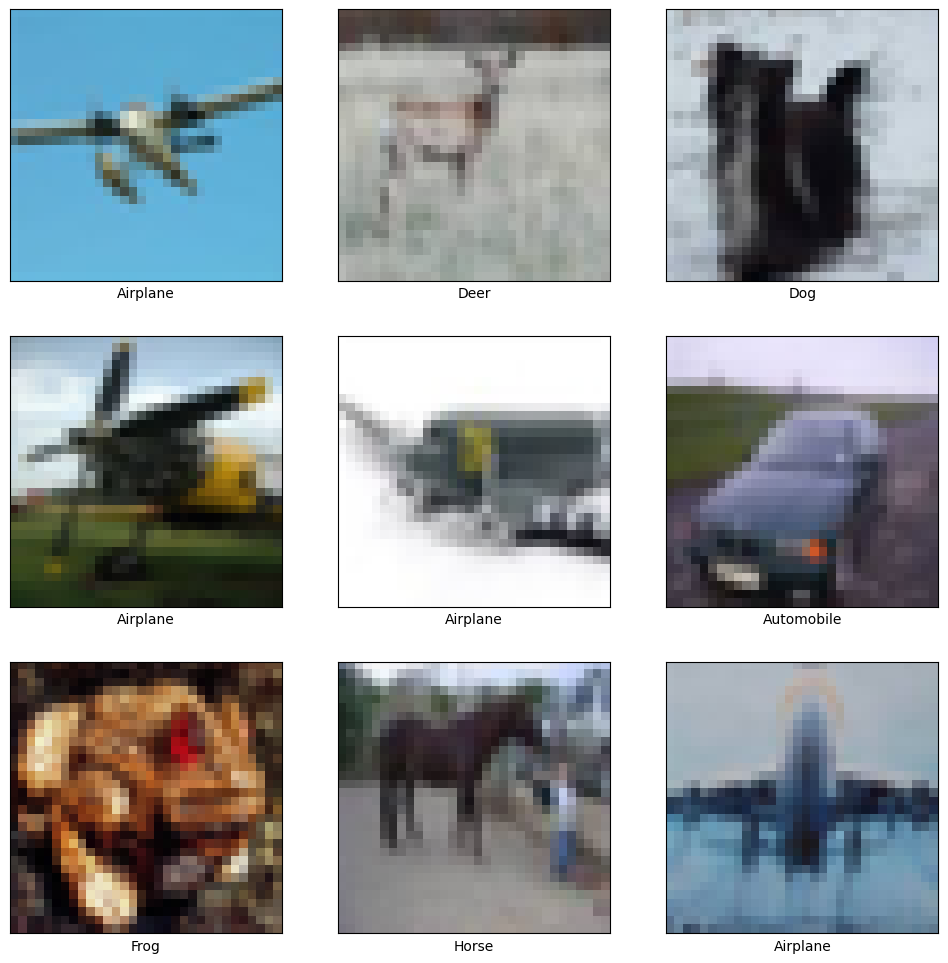

In [6]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

import matplotlib.pyplot as plt
import numpy as np

Indexes = np.random.randint(50000,
                            size = 9) 

plt.figure(figsize = (12, 12))
for i, idx in enumerate(Indexes):
    plt.subplot(3, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx])
    plt.xlabel(class_names[int(y_train[idx])])
    
plt.show()

* RGB Channels

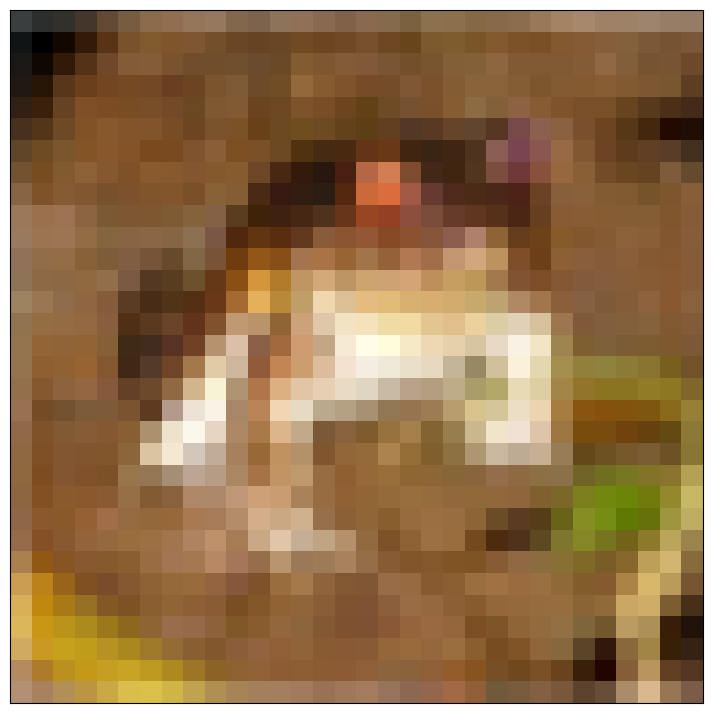

In [7]:
digit = X_train[0]

plt.figure(figsize = (9, 9))
plt.imshow(digit)
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
import numpy as np
import sys
np.set_printoptions(linewidth = 150, threshold = sys.maxsize)

print(y_train[0])
print()
print(X_train[0][0][0])
# print(X_train[0][:, :, 0])

[6]

[59 62 63]


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (50000, 32, 32, 3) to (50000, 3072)

In [9]:
X_train = X_train.reshape((50000, 32 * 32 * 3))
X_test = X_test.reshape((10000, 32 * 32 * 3))

X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

* Normalization

In [10]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [11]:
print(X_train[0])

[0.23137255 0.24313725 0.24705882 0.16862745 0.18039216 0.17647059 0.19607843 0.18823529 0.16862745 0.26666667 0.21176471 0.16470588 0.38431373
 0.28627451 0.20392157 0.46666667 0.35686275 0.24705882 0.54509804 0.41960784 0.29411765 0.56862745 0.43137255 0.31372549 0.58431373 0.45882353
 0.34901961 0.58431373 0.47058824 0.36470588 0.51372549 0.40392157 0.30196078 0.49019608 0.38823529 0.29803922 0.55686275 0.45098039 0.35686275
 0.56470588 0.43921569 0.3372549  0.5372549  0.41176471 0.30980392 0.50588235 0.38039216 0.27843137 0.5372549  0.41568627 0.30980392 0.5254902
 0.41568627 0.29803922 0.48627451 0.38039216 0.25098039 0.54509804 0.44313725 0.30588235 0.54509804 0.43921569 0.29411765 0.52156863 0.41176471
 0.27058824 0.53333333 0.41176471 0.29019608 0.54509804 0.42352941 0.30196078 0.59607843 0.47058824 0.34901961 0.63921569 0.51372549 0.39215686
 0.65882353 0.53333333 0.42352941 0.62352941 0.50588235 0.4        0.61960784 0.50980392 0.40784314 0.61960784 0.51764706 0.42352941 0.59

> ## 2) One Hot Encoding

In [12]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


> ## 3) train_test_split( )

* Train(40,000) vs. Validation(10,000)

In [14]:
from sklearn.model_selection import train_test_split 

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size = 0.2,
                                                      random_state = 2045)

# III. Keras Modeling

> ## Model Define

> ## Model compile

In [15]:
from tensorflow.keras import backend as K

K.clear_session()

In [31]:
from tensorflow.keras import models, layers

CIFAR = models.Sequential(name = 'EarlyStopping')
CIFAR.add(layers.Dense(2048, activation = 'relu', input_shape=(32 * 32 * 3,)))
CIFAR.add(layers.Dropout(0.5))
CIFAR.add(layers.Dense(1024, activation = 'relu'))
CIFAR.add(layers.Dropout(0.25))
CIFAR.add(layers.Dense(512, activation = 'relu'))
CIFAR.add(layers.Dropout(0.1))
CIFAR.add(layers.Dense(10, activation = 'softmax'))

CIFAR.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


In [32]:
CIFAR.summary()

Model: "EarlyStopping"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 2048)              6293504   
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_8 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 10)              

> ## EarlyStopping, ModelCheckpoint 작업

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

ES = EarlyStopping(monitor = 'val_accuracy',
                   mode = 'max',
                   patience = 500,
                   verbose = 1)

MC = ModelCheckpoint('best_CIFAR.h5',
                     monitor = 'val_accuracy',
                     mode = 'max',
                     save_best_only = True,
                     verbose = 1)

> ## Model Fit

In [36]:
%%time

Hist_CIFAR = CIFAR.fit(X_train, y_train,
                       epochs = 500,
                       batch_size = 50,
                       validation_split = 0.2,
                       callbacks = [ES, MC],
                       verbose = 1)

Epoch 1/500
639/640 [============================>.] - ETA: 0s - loss: 1.9601 - accuracy: 0.2655
Epoch 1: val_accuracy improved from 0.27875 to 0.31350, saving model to best_CIFAR.h5
640/640 [==============================] - 3s 5ms/step - loss: 1.9603 - accuracy: 0.2655 - val_loss: 1.8828 - val_accuracy: 0.3135
Epoch 2/500
631/640 [============================>.] - ETA: 0s - loss: 1.9420 - accuracy: 0.2706
Epoch 2: val_accuracy improved from 0.31350 to 0.31413, saving model to best_CIFAR.h5
640/640 [==============================] - 3s 5ms/step - loss: 1.9422 - accuracy: 0.2708 - val_loss: 1.9166 - val_accuracy: 0.3141
Epoch 3/500
634/640 [============================>.] - ETA: 0s - loss: 1.9317 - accuracy: 0.2768
Epoch 3: val_accuracy did not improve from 0.31413
640/640 [==============================] - 4s 6ms/step - loss: 1.9315 - accuracy: 0.2767 - val_loss: 1.9038 - val_accuracy: 0.3063
Epoch 4/500
632/640 [============================>.] - ETA: 0s - loss: 1.9182 - accuracy: 0.2

In [37]:
from tensorflow.keras.models import load_model

best_CIFAR = load_model('best_CIFAR.h5')

> ## Model Evaluate

In [38]:
loss, accuracy = best_CIFAR.evaluate(X_test, y_test, verbose=0)

print('loss = ', loss)
print('accuracy = ', accuracy)

loss =  1.6397374868392944
accuracy =  0.42969998717308044


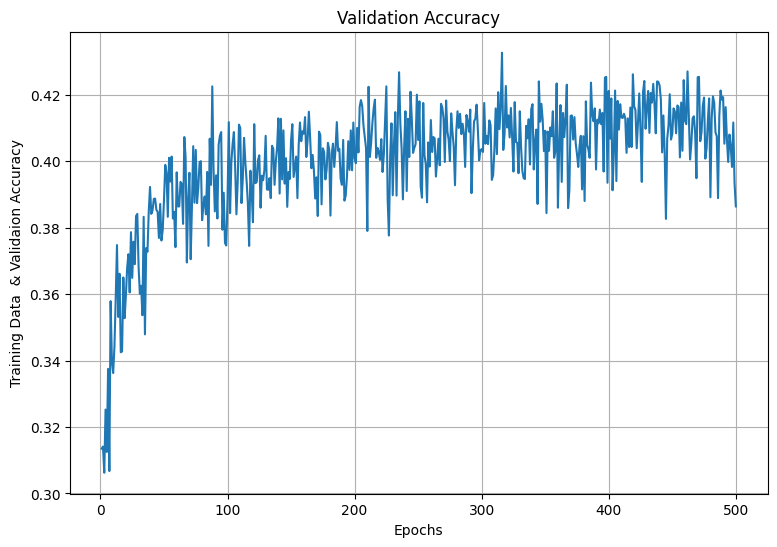

In [39]:
import matplotlib.pyplot as plt
epochs = range(1, len(Hist_CIFAR.history['val_accuracy']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_CIFAR.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Training Data  & Validaion Accuracy')
plt.grid()
plt.show()

# 
# 
# 
# The End
# 
# 
# 